In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
#hard_elec = pd.read_csv('hardness_composition_data.csv')

#hard = pd.read_csv("hardness_composition_data.csv")
#hard_elec_ip = hard_elec.drop(columns = ["Hardness"])
#hard_elec_op =hard_elec["Hardness"]






In [2]:
hard = pd.read_csv("hardness_composition_data.csv")
hard_ip = hard.drop(columns = ["HV"])
hard_op = hard["HV"]
hard.head()

,Al,Co,Fe,Ni,Si,Mn,Cr,Mo,Ti,Cu,...,V,Nb,Sn,Zn,Ta,Hf,W,MP,HT,HV
0,0.0000,0.3181,0.3551,0.3268,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,125.0
1,0.0963,0.3073,0.3045,0.2919,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,138.0
2,0.1742,0.2749,0.2781,0.2728,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,212.0
3,0.2287,0.2585,0.2613,0.2515,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,385.0
4,0.2842,0.2392,0.2438,0.2328,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,453.0


In [3]:
X = hard_ip
y = hard_op

In [4]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
   y,
    test_size=0.1,
    random_state=0)

X_train.shape, X_test.shape

((384, 20), (43, 20))

In [5]:
# Load the trained model
with open('model_compo.pkl', 'rb') as f:
    clf2 = pickle.load(f)
import pickle


# Now you can use clf2 to make predictions or perform other tasks


# Predict using the trained model
prediction = clf2.predict(X_test.iloc[0:1]) # Predict using the first row of the test set
print(prediction)

[850.26666667]


In [6]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
import shap
shap.initjs()

PermutationExplainer explainer: 428it [04:18,  1.60it/s]                                                               


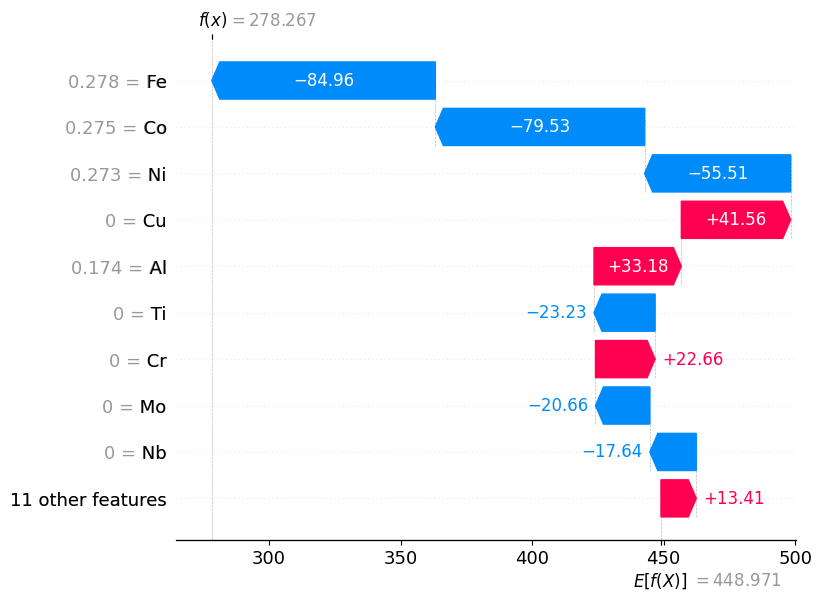

In [8]:
# Explain model predictions using SHAP
#explainer = shap.Explainer(clf2.predict)
#shap_values = explainer(X)
# Plot SHAP waterfall plots
import shap

# Assuming clf2 is your trained model and X is your input data
explainer = shap.Explainer(clf2.predict, masker=shap.maskers.Independent(X))

# Calculate SHAP values
shap_values = explainer(X)

# Plot SHAP waterfall plots for the first instance
shap.waterfall_plot(shap_values[2])


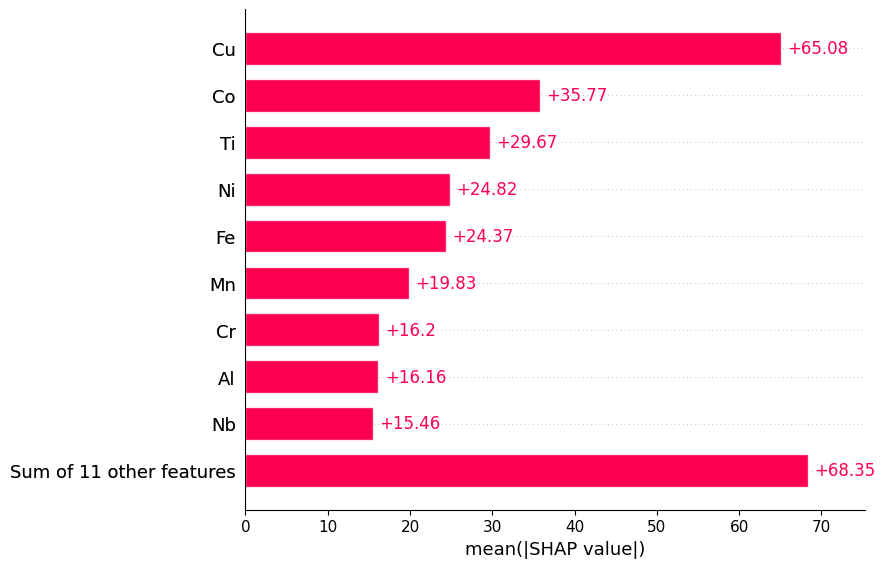

In [9]:
shap.plots.bar(shap_values)

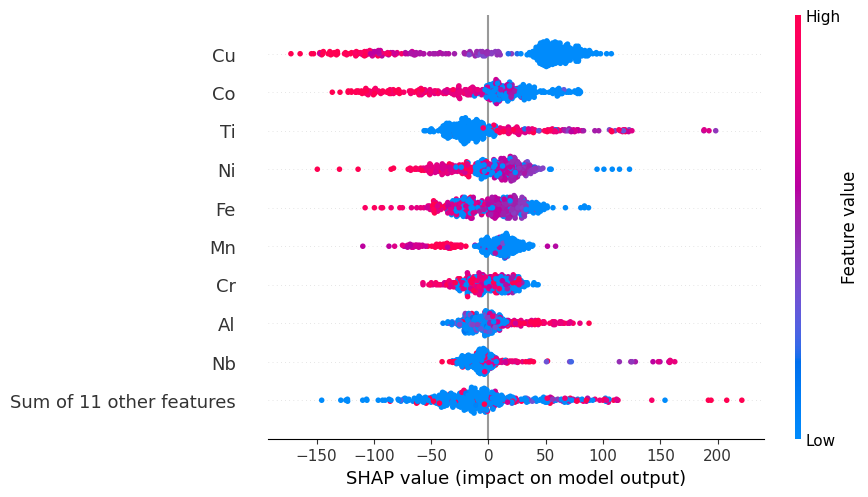

In [10]:
shap.plots.beeswarm(shap_values)

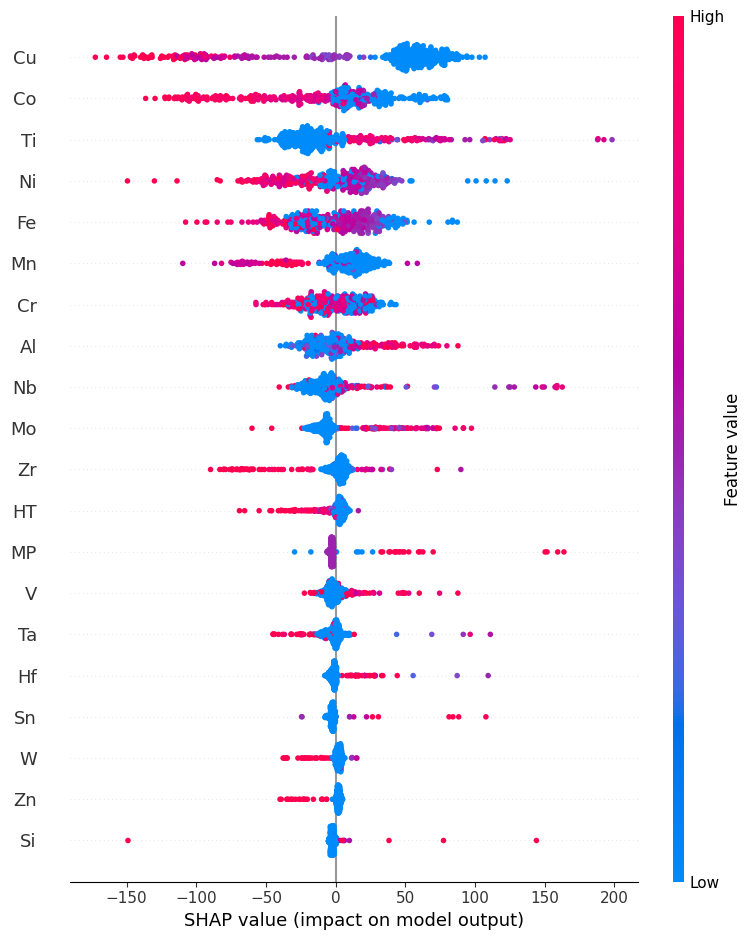

In [11]:
# Summary plot for all instances
shap.summary_plot(shap_values, X)


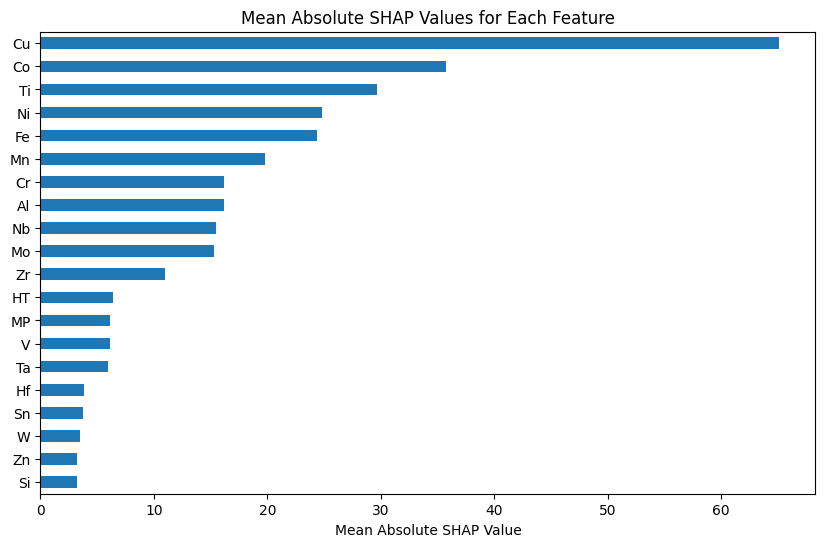

In [12]:
import matplotlib.pyplot as plt

# Calculate mean absolute SHAP values
mean_shap = np.abs(shap_values.values).mean(axis=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_shap_series = pd.Series(mean_shap, index=X.columns)
mean_shap_series.sort_values().plot(kind='barh')
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Mean Absolute SHAP Values for Each Feature')
plt.show()


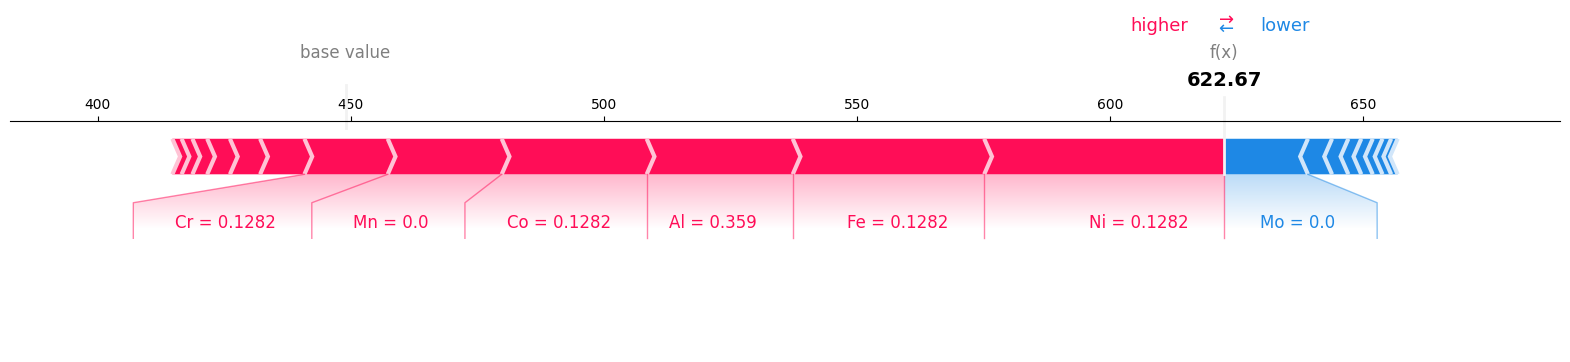

In [13]:


# Plot SHAP force plot for row 47
shap.force_plot(shap_values[47], matplotlib=True)


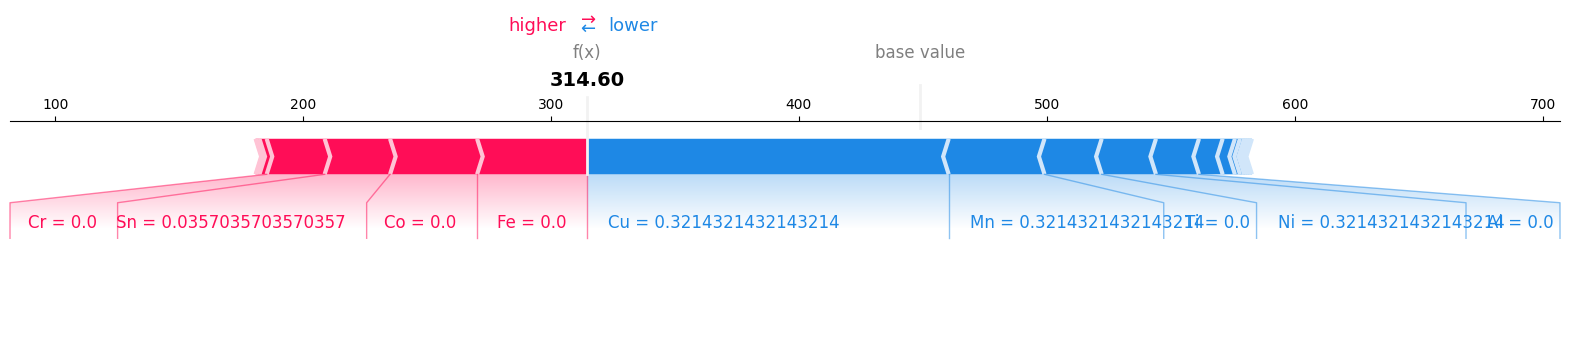

In [14]:
shap.force_plot(shap_values[170], matplotlib=True)

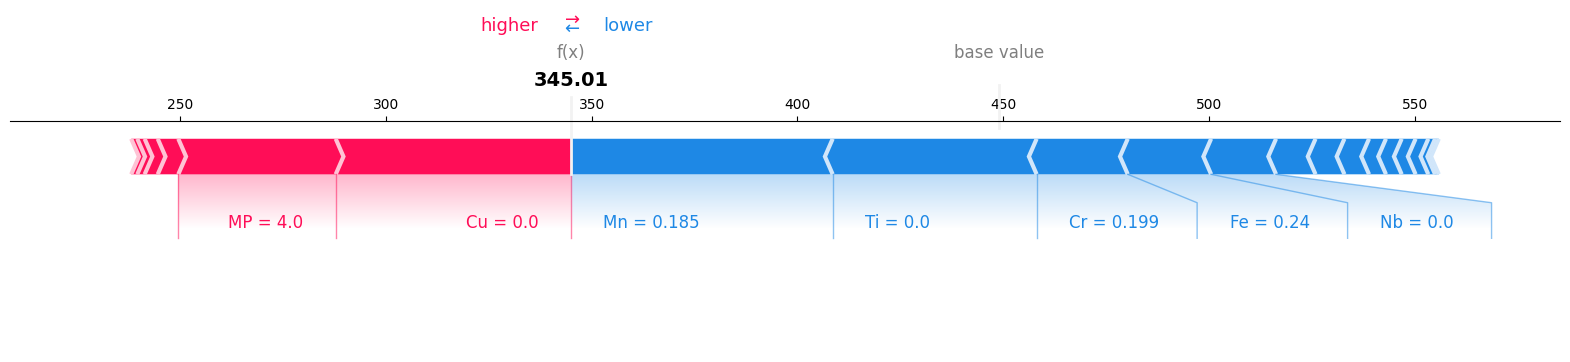

In [15]:
shap.force_plot(shap_values[425], matplotlib=True)

In [16]:
import pandas as pd

# Convert to DataFrame if not already
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

# Check the data types
print(X.dtypes)



Al    float64
Co    float64
Fe    float64
Ni    float64
Si    float64
Mn    float64
Cr    float64
Mo    float64
Ti    float64
Cu    float64
Zr    float64
V     float64
Nb    float64
Sn    float64
Zn    float64
Ta    float64
Hf    float64
W     float64
MP      int64
HT      int64
dtype: object


In [17]:
X = X.astype(float)


In [18]:
print(f"SHAP values shape: {shap_values.values.shape}")
print(f"Input data shape: {X.shape}")



SHAP values shape: (427, 20)
Input data shape: (427, 20)


In [19]:
#shap.dependence_plot('Al', shap_values, X)


In [20]:
print(type(shap_values))
print(shap_values.shape)


<class 'shap._explanation.Explanation'>
(427, 20)


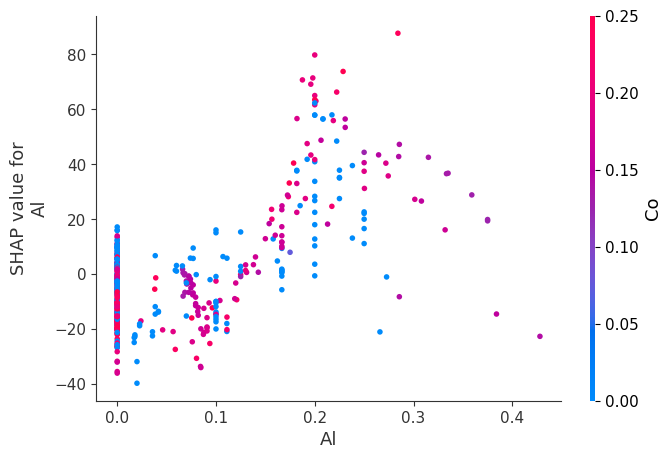

In [21]:
shap.dependence_plot('Al', shap_values.values, X, interaction_index='Co')


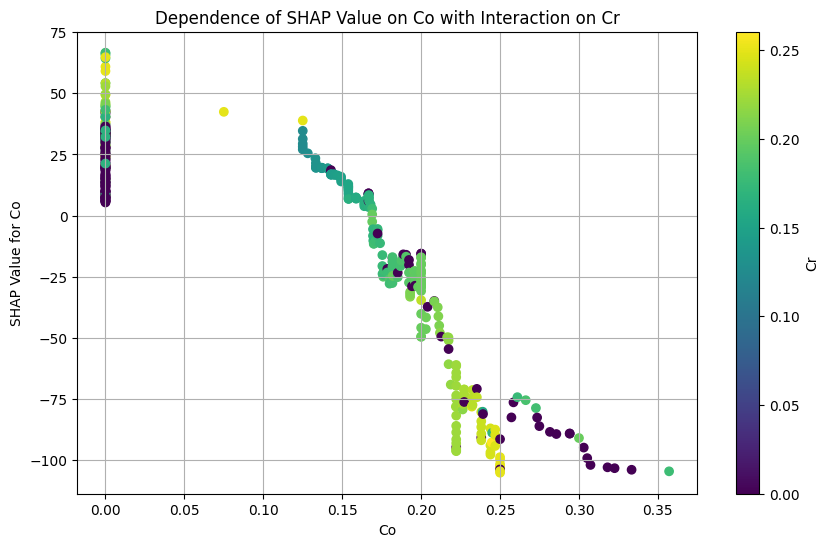

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Extract SHAP values for 'Al' and corresponding feature values
al_shap_values = shap_values.values[:, X.columns.get_loc('Co')]
cr_feature_values = X['Cr'].values

# Sort values based on feature 'Al' for a smooth curve
sorted_idx = np.argsort(X['Co'].values)
al_sorted = X['Co'].values[sorted_idx]
al_shap_sorted = al_shap_values[sorted_idx]

# Apply Gaussian smoothing to the SHAP values
smoothed_shap_values = gaussian_filter1d(al_shap_sorted, sigma=2)

# Color the plot based on the Cr feature values
plt.figure(figsize=(10, 6))
plt.scatter(al_sorted, smoothed_shap_values, c=cr_feature_values[sorted_idx], cmap='viridis', label='Smoothed SHAP values')
plt.colorbar(label='Cr')
plt.xlabel('Co')
plt.ylabel('SHAP Value for Co')
plt.title('Dependence of SHAP Value on Co with Interaction on Cr')
plt.grid(True)
plt.show()


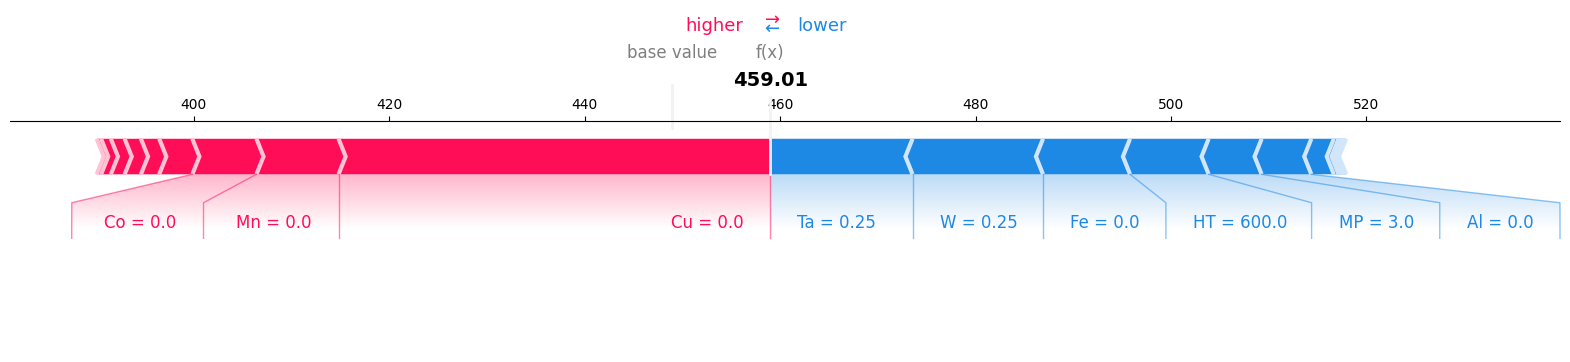

In [23]:
shap.force_plot(shap_values[353], matplotlib=True)

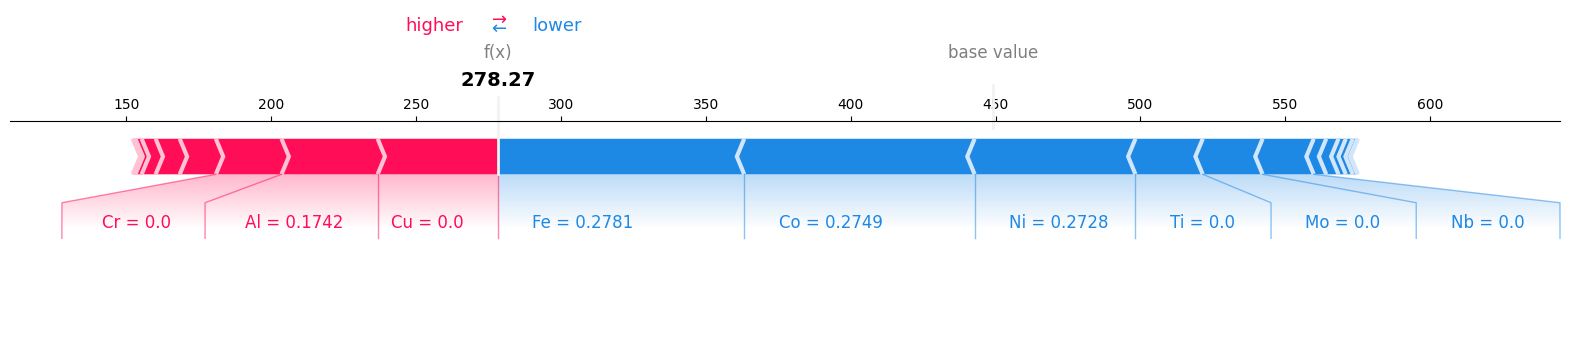

In [24]:
shap.force_plot(shap_values[2], matplotlib=True)

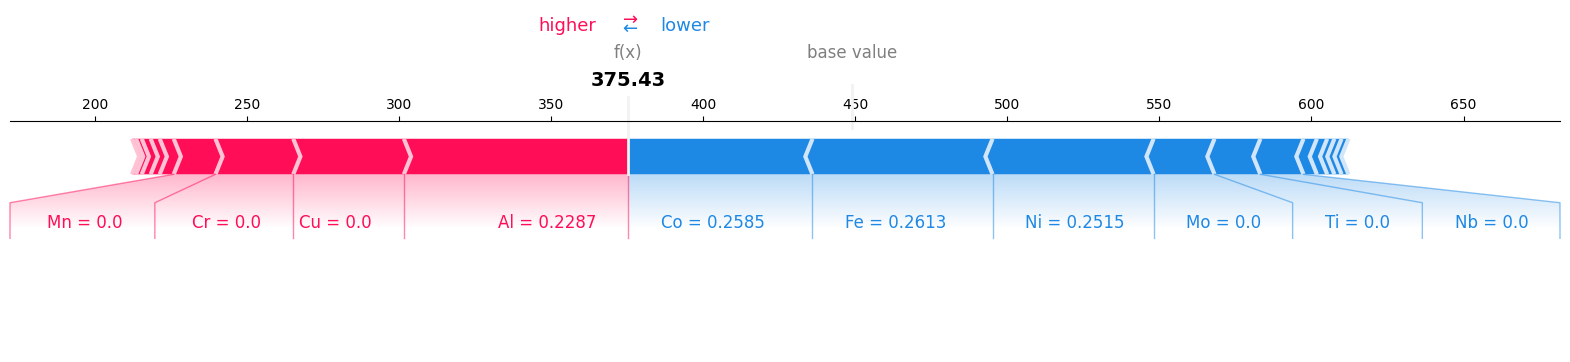

In [25]:
shap.force_plot(shap_values[3], matplotlib=True)

In [26]:
#no addition of Cr, Cu can increase the hardness and no additiob of Mo,Ti can decrease the hardness 

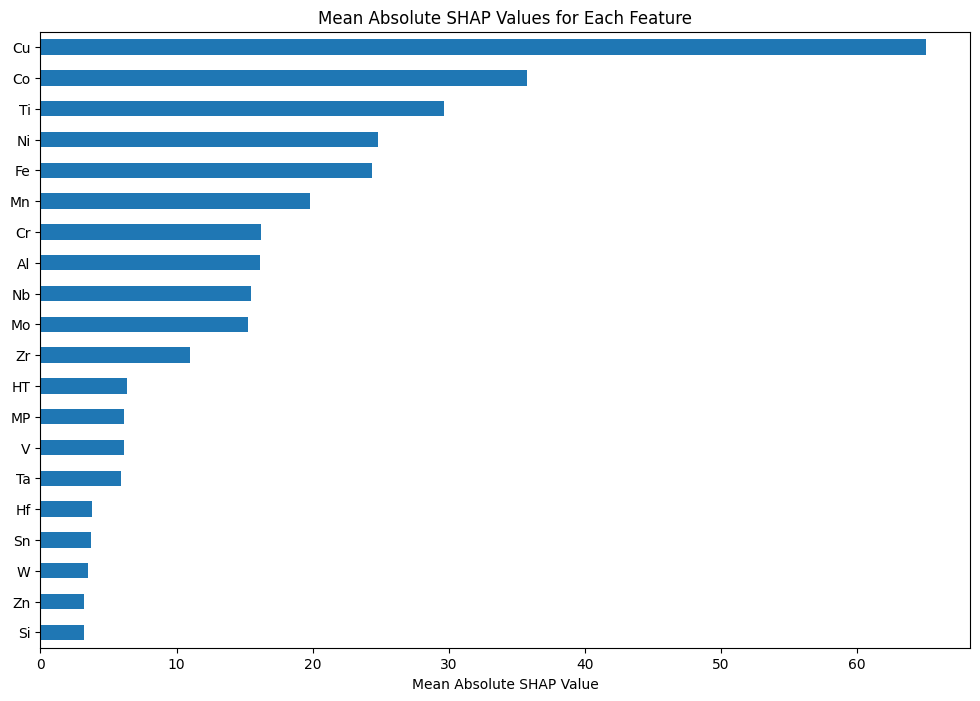

In [27]:
import matplotlib.pyplot as plt

# Calculate mean absolute SHAP values
mean_shap = np.abs(shap_values.values).mean(axis=0)

# Create a bar plot
plt.figure(figsize=(12, 8))
mean_shap_series = pd.Series(mean_shap, index=X.columns)
mean_shap_series.sort_values().plot(kind='barh')
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Mean Absolute SHAP Values for Each Feature')
plt.show()

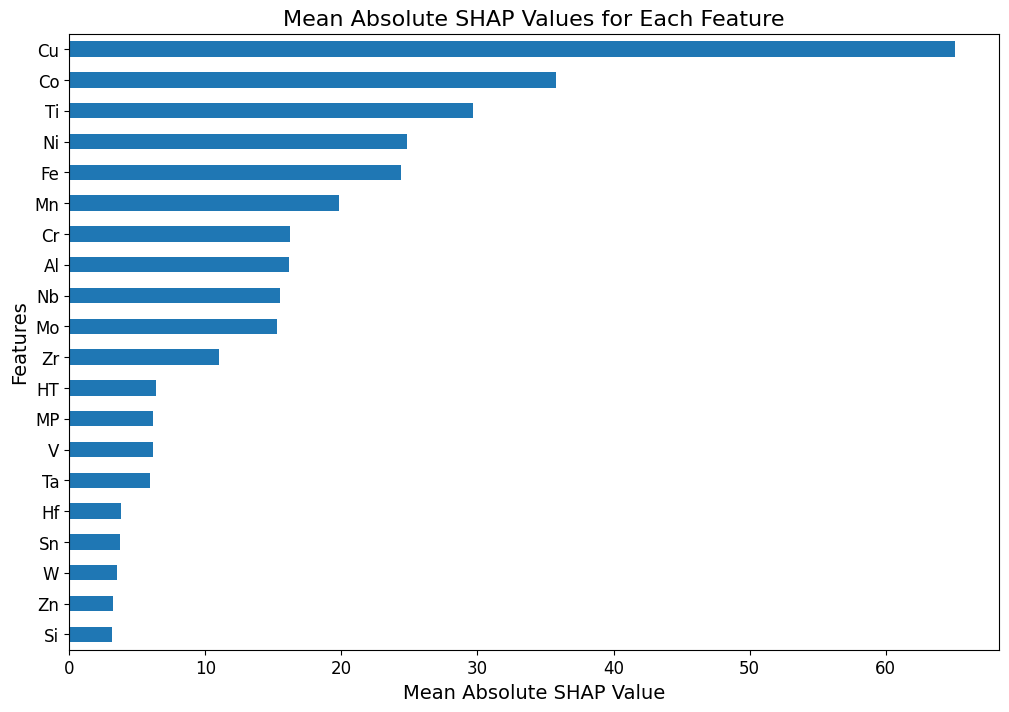

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate mean absolute SHAP values
mean_shap = np.abs(shap_values.values).mean(axis=0)

# Create a bar plot
plt.figure(figsize=(12, 8))
mean_shap_series = pd.Series(mean_shap, index=X.columns)
mean_shap_series.sort_values().plot(kind='barh')

# Increase font size
plt.xlabel('Mean Absolute SHAP Value', fontsize=14)  # Set the x-axis label font size
plt.ylabel('Features', fontsize=14)                  # Set the y-axis label font size
plt.title('Mean Absolute SHAP Values for Each Feature', fontsize=16)  # Set the title font size

# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


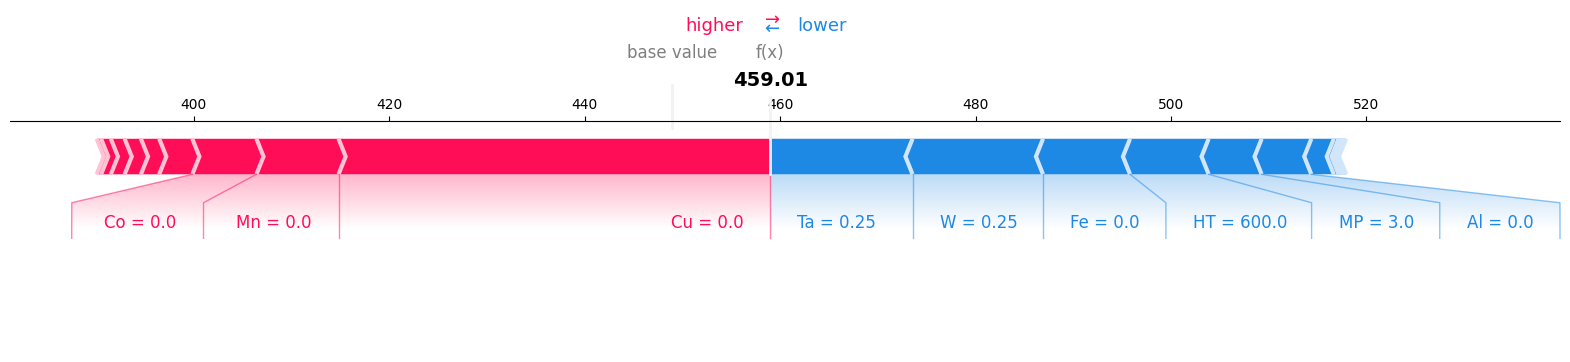

In [29]:
import shap
import matplotlib.pyplot as plt
import shap
import matplotlib.pyplot as plt

# Generate the force plot
force_plot = shap.force_plot(shap_values[353], matplotlib=True)



In [30]:
import matplotlib

# Access the matplotlib figure
fig = plt.gcf()

# Loop through all text elements in the plot and customize their font properties
for text in fig.findobj(matplotlib.text.Text):
    text.set_fontsize(10)
    text.set_fontweight('bold')

# Show the plot with customized text
plt.show()


<Figure size 640x480 with 0 Axes>

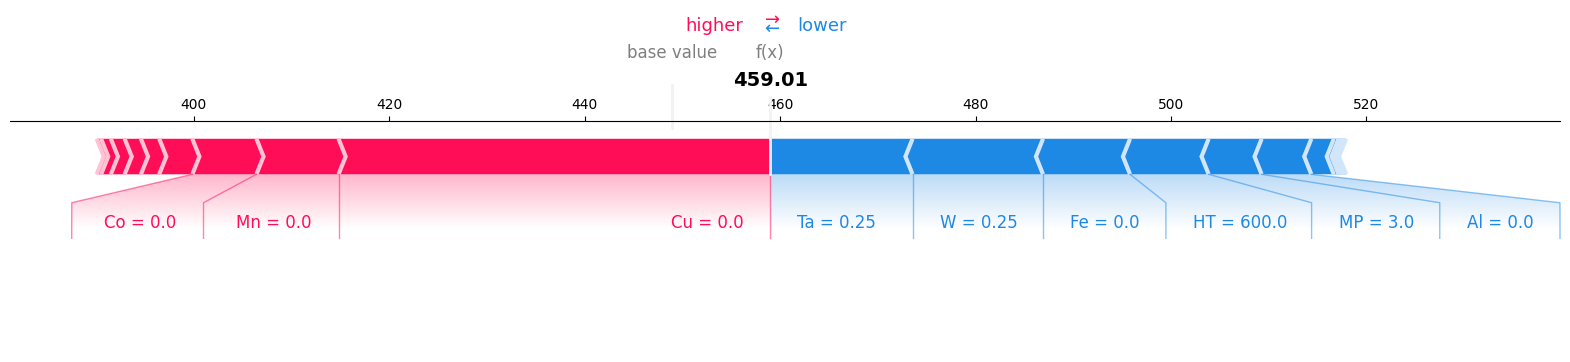

<Figure size 640x480 with 0 Axes>

In [31]:
import shap
import matplotlib.pyplot as plt
import matplotlib

# Generate the force plot
force_plot = shap.force_plot(shap_values[353], matplotlib=True)

# Save the plot to a file
plt.savefig('force_plot.png')


In [32]:
from PIL import Image

# Load and display the saved image
img = Image.open('force_plot.png')
img.show()


In [33]:
import matplotlib

# Access the matplotlib figure
fig = plt.gcf()

# Loop through all text elements in the plot and customize their font properties
for text in fig.findobj(matplotlib.text.Text):
    text.set_fontsize(10)
    text.set_fontweight('bold')

# Save and display the customized plot
plt.savefig('customized_force_plot.png')
img = Image.open('customized_force_plot.png')
img.show()


<Figure size 640x480 with 0 Axes>

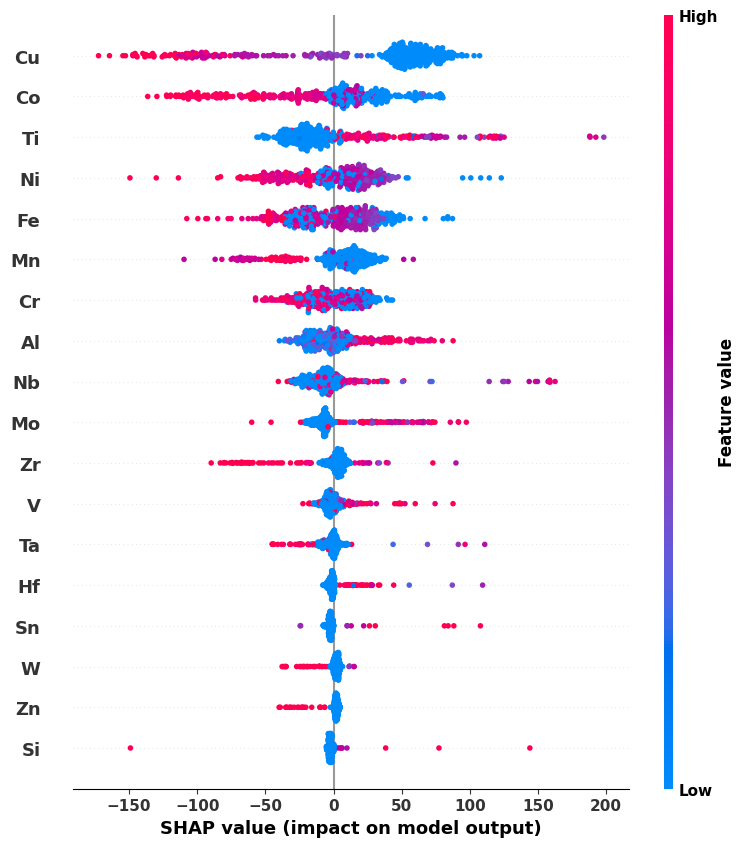

In [35]:
import matplotlib.pyplot as plt

# Set bold and larger font for the plot
plt.rcParams.update({
    'font.size': 14,          # Adjust the size as per your preference (e.g., 14 for larger text)
    'font.weight': 'bold',    # Make the text bold
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'xtick.labelsize': 14,    # Tick label font size
    'ytick.labelsize': 14,    # Tick label font size
    'legend.fontsize': 14     # Legend font size
})

# Remove 'MP' and 'HT' columns from both the feature matrix and SHAP values
X_filtered = X.drop(columns=['MP', 'HT'])
shap_values_filtered = shap_values[:, :-2]  # Remove the last two SHAP values corresponding to 'MP' and 'HT'

# Generate SHAP summary plot without 'MP' and 'HT'
shap.summary_plot(shap_values_filtered, X_filtered)

# Restore default settings if needed after the plot
plt.rcdefaults()


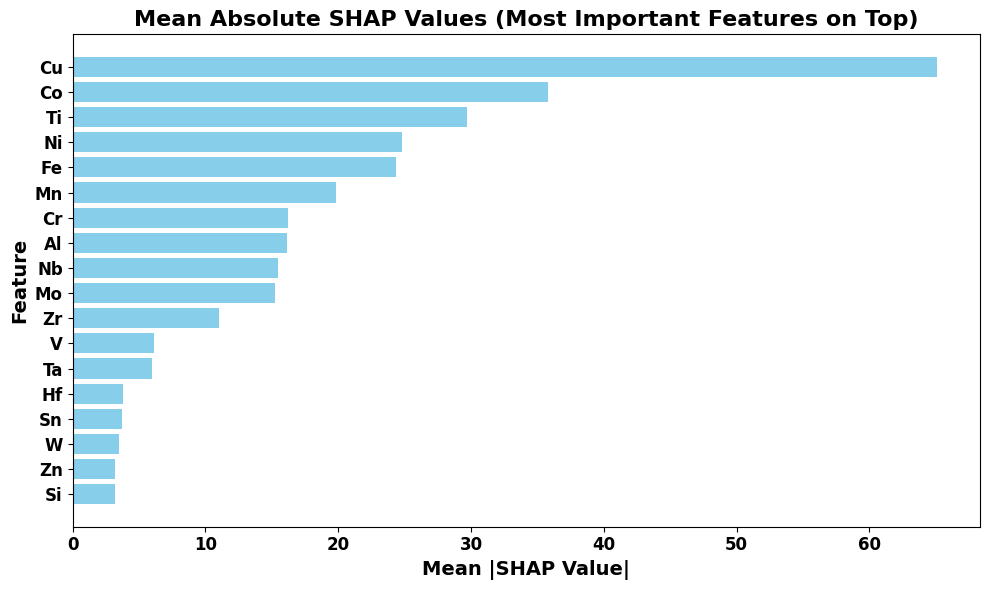

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Remove 'MP' and 'HT' columns from both the feature matrix and SHAP values
X_filtered = X.drop(columns=['MP', 'HT'])
shap_values_filtered = shap_values.values[:, :-2]  # Remove SHAP values corresponding to 'MP' and 'HT'

# Calculate mean absolute SHAP values
mean_shap = np.abs(shap_values_filtered).mean(axis=0)

# Create a DataFrame to hold feature names and their mean SHAP values
shap_df = pd.DataFrame({
    'Feature': X_filtered.columns,
    'Mean SHAP': mean_shap
})

# Sort the DataFrame by 'Mean SHAP' values in descending order
shap_df = shap_df.sort_values(by='Mean SHAP', ascending=False)

# Create a horizontal bar plot with the most important features at the top
plt.figure(figsize=(10, 6))
plt.barh(shap_df['Feature'], shap_df['Mean SHAP'], color='skyblue')

# Invert y-axis so the most important feature is on top
plt.gca().invert_yaxis()

# Customize the plot with bold and larger font
plt.xlabel('Mean |SHAP Value|', fontsize=14, fontweight='bold')
plt.ylabel('Feature', fontsize=14, fontweight='bold')
plt.title('Mean Absolute SHAP Values (Most Important Features on Top)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


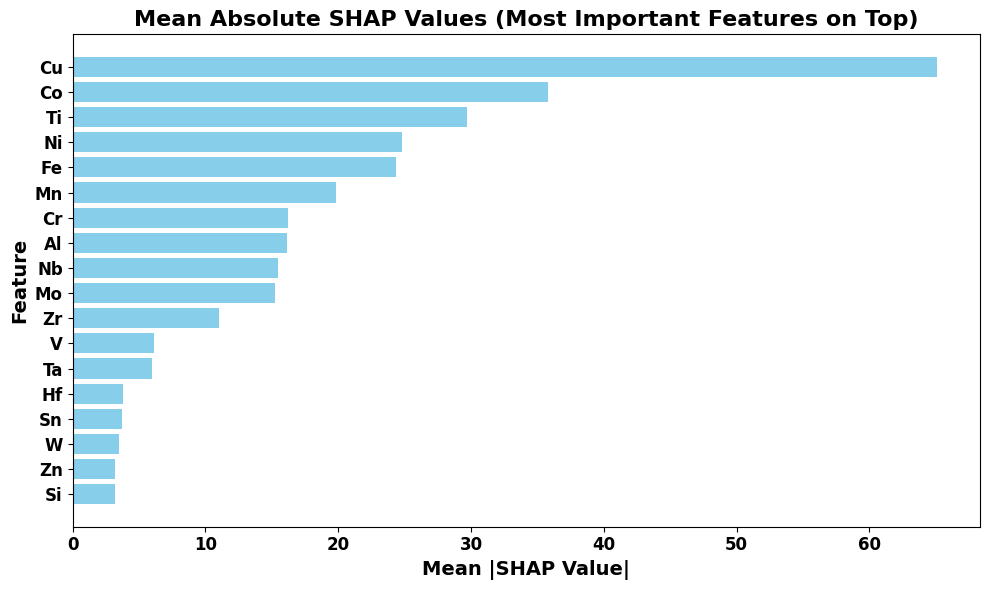

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Remove 'MP' and 'HT' columns from both the feature matrix and SHAP values
X_filtered = X.drop(columns=['MP', 'HT'])
shap_values_filtered = shap_values.values[:, :-2]  # Remove SHAP values corresponding to 'MP' and 'HT'

# Calculate mean absolute SHAP values
mean_shap = np.abs(shap_values_filtered).mean(axis=0)

# Create a DataFrame to hold feature names and their mean SHAP values
shap_df = pd.DataFrame({
    'Feature': X_filtered.columns,
    'Mean SHAP': mean_shap
})

# Sort the DataFrame by 'Mean SHAP' values in descending order
shap_df = shap_df.sort_values(by='Mean SHAP', ascending=True)  # Ascending to place the most important on top

# Create a horizontal bar plot with the most important features at the top
plt.figure(figsize=(10, 6))
plt.barh(shap_df['Feature'], shap_df['Mean SHAP'], color='skyblue')

# No need to invert the y-axis as the sorting will handle this now
plt.xlabel('Mean |SHAP Value|', fontsize=14, fontweight='bold')
plt.ylabel('Feature', fontsize=14, fontweight='bold')
plt.title('Mean Absolute SHAP Values (Most Important Features on Top)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()
